In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb # 需要安装 pip install pandas_datareader
import datetime
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
sh_table = pd.read_csv('000001.SS.csv')

In [28]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016,5,20)

In [29]:
sh = data.DataReader("000001.SS", 'yahoo', start, end)

In [30]:
sh.head(3) # 数据获取成功

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,3289.750000,3295.279053,3243.319092,3243.760010,3243.760010,109400
2010-01-05,3254.468018,3290.511963,3221.461914,3282.178955,3282.178955,126200
2010-01-06,3277.517090,3295.867920,3253.043945,3254.215088,3254.215088,123600


In [31]:
sh.describe() # 数据整体概览

,Open,High,Low,Close,Adj Close,Volume
count,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,2659.930065,2685.134673,2634.536714,2662.850010,2662.850010,163582.903226
std,598.499649,611.277584,582.025113,599.169620,599.169620,143178.486481
min,1935.515991,1959.157959,1849.652954,1950.011963,1950.011963,0.000000
25%,2198.475098,2218.034607,2183.512817,2198.712891,2198.712891,78725.000000
50%,2483.253418,2507.597412,2459.354004,2483.584961,2483.584961,108650.000000
75%,2979.834473,3002.205322,2946.201538,2978.579712,2978.579712,182675.000000
max,5174.417969,5178.190918,5103.400879,5166.350098,5166.350098,857100.000000


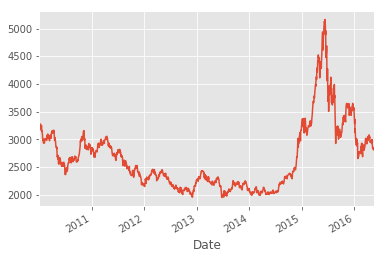

In [32]:
sh['Close'].plot();

In [33]:
sh = sh.drop('Volume',axis=1)

In [34]:
sh.head(2) # Volume列消失了

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-01-04,3289.750000,3295.279053,3243.319092,3243.760010,3243.760010
2010-01-05,3254.468018,3290.511963,3221.461914,3282.178955,3282.178955


In [35]:
pd.isnull(sh).head() # or sh.isnull()

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-01-04,False,False,False,False,False
2010-01-05,False,False,False,False,False
2010-01-06,False,False,False,False,False
2010-01-07,False,False,False,False,False
2010-01-08,False,False,False,False,False


In [36]:
sh.isnull().values.any()

False

In [37]:
sh.isnull().values.sum()

0

In [38]:
change = sh.Close.diff()
change.fillna(change.mean(),inplace=True)
sh['Change'] = change

In [39]:
sh['pct_change'] = sh.Change.pct_change()
sh.iloc[5:9]

,Open,High,Low,Close,Adj Close,Change,pct_change
Date,,,,,,,
2010-01-11,3301.611084,3306.750000,3197.327881,3212.750000,3212.750000,16.752930,4.200850
2010-01-12,3205.705078,3275.201904,3180.084961,3273.966064,3273.966064,61.216064,2.654051
2010-01-13,3204.976074,3232.818115,3165.485107,3172.657959,3172.657959,-101.308105,-2.654927
2010-01-14,3183.381104,3219.016113,3165.594971,3215.550049,3215.550049,42.892090,-1.423383


In [40]:
sh['group_index'] = sh.index.map(lambda x: 100*x.year + x.month)

In [18]:
sh.head()

,Open,High,Low,Close,Adj Close,Change,pct_change,group_index
Date,,,,,,,,
2010-01-04,3289.750000,3295.279053,3243.319092,3243.760010,3243.760010,-0.270030,NaN,201001
2010-01-05,3254.468018,3290.511963,3221.461914,3282.178955,3282.178955,38.418945,-143.276366,201001
2010-01-06,3277.517090,3295.867920,3253.043945,3254.215088,3254.215088,-27.963867,-1.727867,201001
2010-01-07,3253.990967,3268.819092,3176.707031,3192.775879,3192.775879,-61.439209,1.197093,201001
2010-01-08,3177.259033,3198.919922,3149.017090,3195.997070,3195.997070,3.221191,-1.052429,201001


In [41]:
sh.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-16', '2016-05-17', '2016-05-18',
               '2016-05-19', '2016-05-20'],
              dtype='datetime64[ns]', name=u'Date', length=1550, freq=None)

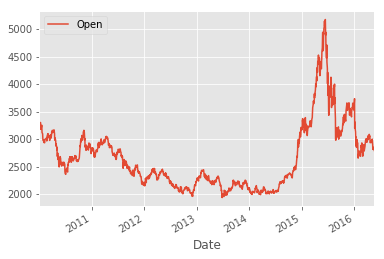

In [42]:
sh[['Open']].plot();
plt.show()